In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime
import random

In [2]:
class Person:
    """
    Class to represent each individal poutfit being recorded during Deployment, made up of garments.
    """

    def __init__(
        self, Name,
        backneck:str,   back:str,        chest:str, 
        leftab:str,     rightab:str, 
        rightuparm:str, rightlowarm:str, 
        leftuparm:str,  leftlowarm:str, 
        beanie1:str,    beanie2:str,     beanie3:str, beanieR:str, beanieL:str
    ):
        self.Backneck    = backneck        # Tag ID's for the shirt
        self.Back        = back
        self.Chest       = chest
        self.Leftab      = leftab
        self.Rightab     = rightab
        self.Rightuparm  = rightuparm
        self.Rightlowarm = rightlowarm
        self.Leftuparm   = leftuparm
        self.Leftlowarm  = leftlowarm
        self.Beanie1     = beanie1         # Tag ID's for the beanies
        self.Beanie2     = beanie2
        self.Beanie3     = beanie3
        self.BeanieR     = beanieR
        self.BeanieL     = beanieL

        self.Name = Name               # Soldier's Name

        self.ShirtMapping = {
            self.Backneck:    Name + " Back Neck",
            self.Back:        Name + " Back",
            self.Chest:       Name + " Chest",
            self.Leftab:      Name + " Left Abdomen",
            self.Rightab:     Name + " Right Abdomen",
            self.Rightuparm:  Name + " Right Upper Arm",
            self.Rightlowarm: Name + " Right Lower Arm",
            self.Leftlowarm:  Name + " Left Lower Arm",
            self.Leftuparm:   Name + " Left Upper Arm",
        }

        self.TagList = [
            self.Backneck,   self.Back, self.Chest,
            self.Leftab,     self.Rightab,
            self.Rightuparm, self.Rightlowarm,
            self.Leftuparm,  self.Leftlowarm,
            self.Beanie1,    self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL
        ]

        self.BeanieList = [self.Beanie1, self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL]

        # self.Color = "#" + "%06x" % random.randint(0, 0xFFFFFF)



In [3]:
def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1900, 1, day,int(h),int(m),int(s)))
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

In [4]:
person1  = Person("", "438F", "1D6C", "458B", "3D0D", "7B11", "0843", "4BA9", "56A4", "A268", "4E72", "5A88", "7342", "5481", "8839");
person2  = Person("saddlebrown", "333B", "289B", "2473", "231D", "9879", "4067", "5FB6", "169E", "8D50", "74C4", "73DC", "DC4A", "884D", "1BA4");
person3  = Person("", "886B", "47D0", "AE3E", "7645", "103F", "7E6F", "64C0", "2887", "8915", "6765", "A27E", "0C71", "7508", "A8BE");
person4  = Person("", "9854", "A3B0", "9EC6", "9A91", "343B", "87D4", "81D4", "8A53", "1397", "A467", "4191", "4F07", "2966", "7B7F");
person5  = Person("", "777F", "67DB", "184A", "885D", "71CF", "BA4C", "8FA9", "B6A1", "2C97", "91A6", "9B91", "6382", "79D1", "1748");
person6  = Person("black", "71BB", "7705", "B25E", "3247", "A9B5", "6C38", "7662", "A983", "098F", "B644", "7BCC", "B576", "70D1", "4D84");
person7  = Person("", "6023", "4BAC", "8988", "668B", "B77F", "B0A7", "8062", "7648", "5189", "7033", "1B39", "9643", "9C6D", "A53C");
person8  = Person("", "1B6A", "0D42", "7AD4", "20AF", "493F", "404A", "6878", "1A3B", "546F", "194B", "3133", "A847", "0D50", "7A61");
person9  = Person("", "1A91", "463C", "5199", "0483", "6003", "9F30", "334C", "9877", "5734", "B384", "42A9", "149C", "3991", "5C23");
person10 = Person("", "366C", "A08B", "AC42", "9AC9", "B53F", "76A4", "5E76", "68AE", "41D6", "803F", "5757", "9E54", "----", "----");
person11 = Person("", "2A1B", "238C", "731F", "9591", "5C98", "5F06", "4526", "461C", "5253", "B078", "3AC7", "566B", "65D4", "432B");
person12 = Person("", "87C3", "38D7", "A86F", "637A", "552E", "A34A", "9436", "7FAC", "0C90", "1168", "0F7A", "0068", "175B", "746D");
person13 = Person("mediumseagreen", "A033", "A0C0", "892F", "627F", "6BD9", "3DB0", "8C97", "4ECF", "A73C", "90AE", "78D3", "82D8", "312D", "2A29");
person14 = Person("darkturquoise", "462C", "5B60", "7415", "6310", "1851", "616A", "5DAA", "6D28", "9991", "3B0E", "5374", "682C", "0A50", "1543");
person15 = Person("midnightblue", "9C54", "9968", "65E1", "5E23", "ACB3", "7AD3", "99A1", "B19D", "43C6", "7DCB", "9D35", "6FD0", "34CE", "62E3");
person16 = Person("crimson", "959E", "1C5F", "5A59", "077A", "902A", "3B60", "8199", "4469", "813A", "B7A4", "5163", "4DA5", "8995", "7972");
person17 = Person("cornflowerblue", "6CC7", "8FB7", "799D", "6F8D", "6332", "5A1E", "92A5", "4A3D", "3EC9", "16AB", "A66C", "6162", "A686", "7E1B");
person18 = Person("", "B43E", "19B1", "AEA6", "9152", "59D6", "3060", "7491", "893F", "38C3", "1C81", "A49F", "137F", "AB34", "A82F");
person19 = Person("maroon", "697F", "78A5", "5D0E", "7EC6", "AE59", "8158", "4A9B", "1D44", "2122", "5C02", "2D90", "6DAB", "3374", "B1AB");
person20 = Person("forestgreen", "84B5", "A02C", "0A80", "787B", "83D5", "77DB", "9FA0", "6EC4", "AF3F", "963D", "A79C", "0E4D", "7A91", "460A");
person21 = Person("", "8CB4", "4115", "4D74", "4883", "4C9F", "ABB7", "7938", "390F", "21A5", "A697", "7C7D", "B689", "114D", "047A");
person22 = Person("", "4F0D", "90D5", "0874", "45CE", "6CAC", "3EB2", "A26F", "888C", "50C3", "3767", "664F", "36A4", "2759", "BB8B");
person23 = Person("", "0C7F", "8A16", "57DF", "350F", "46BC", "0A89", "2D1F", "55D6", "7961", "2290", "798F", "B35B", "813B", "027B");
person24 = Person("", "22A0", "746B", "8E41", "933B", "BB81", "39AF", "4436", "826D", "8DBC", "9272", "862E", "3276", "58D6", "2858");
person25 = Person("darkorange", "205E", "9A88", "9F3D", "6F32", "1F74", "51B0", "AD80", "3277", "1E53", "894A", "A258", "3434", "82D3", "51DF");
person26 = Person("red", "4813", "2791", "1F7A", "6F4A", "2383", "2F66", "2E5C", "926A", "2E56", "158F", "5B06", "B28A", "73C6", "819C");
person27 = Person("", "2FA1", "93BD", "913C", "3CD0", "2033", "A071", "3A3A", "7A7E", "9993", "5260", "3E8A", "B55B", "258F", "158E");
person28 = Person("violet", "8977", "4EB3", "AA5E", "6626", "9ABE", "6CD0", "AB8E", "14AA", "6E94", "895D", "571F", "2D68", "8121", "198C");
person29 = Person("", "1466", "75C7", "54C4", "A489", "814C", "155D", "5221", "4293", "5F0A", "703F", "9FBF", "8D33", "3416", "3DB7");
person30 = Person("", "8339", "6E37", "3546", "686E", "0D9F", "9E2A", "4131", "B647", "8A97", "B690", "A688", "9647", "44D6", "94CB");
person31 = Person("", "1CAE", "7764", "8F24", "AD3E", "8898", "413F", "097A", "18A8", "4258", "7F4E", "801E", "8651", "AAB4", "6CB5");
person32 = Person("gold", "2990", "1EC3", "51E2", "3783", "AE5E", "4575", "0688", "A0B0", "1BA6", "3C3E", "1989", "7C2C", "42D7", "6129");

In [5]:
personlist = [
    person1, person2, person3, person4, person5, person6, person7, person8, person9, person10,
    person11, person12, person13, person14, person15, person16, person17, person18, person19, person20,
    person21, person22, person23, person24, person25, person26, person27, person28, person29, person30, person31, person32
]

In [6]:
b_gym1 = MakeDataFromText("MWTC/baseline_gym_1.txt")
b_gym2 = MakeDataFromText("MWTC/baseline_gym_2.txt")
b_gym3 = MakeDataFromText("MWTC/baseline_gym_3.txt")
b_gym4 = MakeDataFromText("MWTC/baseline_gym_4.txt")

In [7]:
count = 0
for b in [b_gym1, b_gym2, b_gym3, b_gym4]:
    for k,v in b.items():
        count += len(v[0])
print(count)

26067


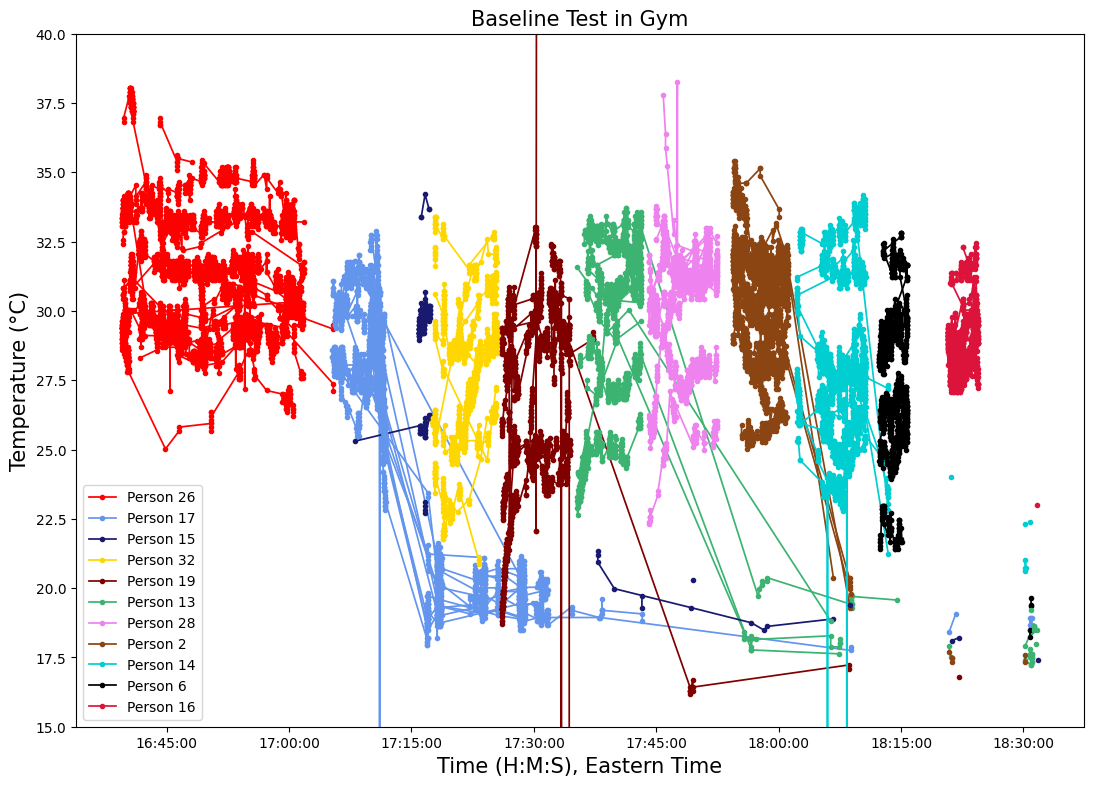

In [11]:
# BASELINE TEST IN GYM

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M:%S')

fig, ax = plt.subplots(figsize=(13, 9))
ax.xaxis.set_major_formatter(myFmt)

for d in [b_gym1, b_gym2, b_gym3, b_gym4]:
    for k,v in d.items():

        id = k[-4:]

        for i in range(len(personlist)):
            if id in personlist[i].TagList:
                if i==19 or i==24:
                    continue
                count += 1

                if len(v[1])>0:
                    ax.plot(v[0], v[1], label="Person " + str(i+1), linewidth=1.25, marker=".", color=personlist[i].Name)
                break

ax.set_ylabel("Temperature (°C)", fontsize=15)
ax.set_xlabel("Time (H:M:S), Eastern Time", fontsize=15)
ax.set_title("Baseline Test in Gym", fontsize=15)
ax.set_ylim(15.0, 40.0)
ax.set_yticks(ticks=[15,17.5,20.0,22.5,25.0,27.5,30.0,32.5,35.0,37.5,40.0], fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc="lower left")

In [9]:
Back_count = 0
neck_count = 0
larm_count = 0
rarm_count = 0
low_count = 0
row_count = 0
lab_count = 0
rab_count = 0
chst_count = 0
beanie_count = 0

l1,l2,l3,l4,l5,l6,l7,l8,l9,l10 = [],[],[],[],[],[],[],[],[],[]

Back_sum = 0
neck_sum = 0
larm_sum= 0
rarm_sum= 0
low_sum = 0
row_sum = 0
lab_sum = 0
rab_sum = 0
chst_sum = 0
beanie_sum = 0

for d in [b_gym1, b_gym2, b_gym3, b_gym4]:
    for k,v in d.items():
        id = k[-4:]

        for reading in v[1]:
            for i in range(len(personlist)):
                if id in personlist[i].TagList:
                    if i==19:
                        continue

                    if id==personlist[i].Back:
                        l1.append(reading)
                        Back_sum += reading
                        Back_count += 1
                    elif id==personlist[i].Backneck:
                        l2.append(reading)
                        neck_sum += reading
                        neck_count += 1
                    elif id==personlist[i].Leftuparm:
                        larm_sum += reading
                        larm_count+=1
                        l3.append(reading)
                    elif id==personlist[i].Rightuparm:
                        rarm_sum += reading
                        rarm_count+=1
                        l4.append(reading)
                    elif id==personlist[i].Leftlowarm:
                        low_sum += reading
                        l5.append(reading)
                        low_count +=1
                    elif id==personlist[i].Rightlowarm:
                        row_sum += reading
                        row_count+=1
                        l6.append(reading)
                    elif id==personlist[i].Leftab:
                        lab_sum += reading
                        lab_count+=1
                        l7.append(reading)
                    elif id==personlist[i].Rightab:
                        rab_sum += reading
                        rab_count +=1
                        l8.append(reading)
                    elif id==personlist[i].Chest:
                        chst_sum += reading
                        chst_count +=1
                        l9.append(reading)
                    elif id in personlist[i].BeanieList:
                        beanie_sum += reading
                        beanie_count +=1
                        l10.append(reading)

# print(Back_count,"back")
# print(neck_count, "neck")
# print(larm_count, "l up arm")
# print(rarm_count, "r up arm")
# print(low_count, "l low arm")
# print(row_count, "r low arm")
# print(lab_count, "l ab")
# print(rab_count, "r ab")
# print(chst_count, "chest")
# print(beanie_count, "beanie")

print(np.std(l1), Back_sum/Back_count,"back")
print(np.std(l2), neck_sum/neck_count, "neck")
print(np.std(l3), larm_sum/larm_count, "l up arm")
print(np.std(l4), rarm_sum/rarm_count, "r up arm")
print(np.std(l5), low_sum/low_count, "l low arm")
print(np.std(l6), row_sum/row_count, "r low arm")
print(np.std(l7), lab_sum/lab_count, "l ab")
print(np.std(l8), rab_sum/rab_count, "r ab")
print(np.std(l9), chst_sum/chst_count, "chest")
print(np.std(l10), beanie_sum/beanie_count, "beanie")

1387 back
533 neck
5511 l up arm
4130 r up arm
1143 l low arm
1330 r low arm
1951 l ab
2489 r ab
4227 chest
3065 beanie
3.717619074017451 30.56106705118958 back
5.886035559832967 25.08600375234517 neck
2.722439406779119 29.169129014697646 l up arm
2.6612851989043618 30.844348668280784 r up arm
4.249573162787341 28.30505686789137 l low arm
3.349376973106597 28.264691729323435 r low arm
3.589612957186019 27.900374167093634 l ab
4.873089139140581 28.554953796705608 r ab
2.4308899659010628 27.71079725573686 chest
3.9074305153841324 27.338704730831914 beanie
